In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
def calc_max(dataframe, healthy_age):
    for i in range (len(dataframe.index)):
        alter_string = dataframe["Alter"][i]    

        alter_string = alter_string.split(" ")
        if i == 0:
            age = float(alter_string[1])        

        if i == 16:
            age = float(alter_string[0])

        if i <16 and i >0:
            age = float(alter_string[0])
        

        lost_time = (healthy_age - age) * int(dataframe["Todesfaelle"][i])

        if lost_time <= 0: 
            lost_time = 0

        dataframe["lost time max"][i] = lost_time


def calc_min(dataframe, healthy_age):
    for i in range (len(dataframe.index)):
        alter_string = dataframe["Alter"][i]    

        alter_string = alter_string.split(" ")
        if i == 0:
            age = float(alter_string[1])        

        if i == 16:
            age = float(alter_string[0])

        if i <16 and i >0:
            age = float(alter_string[3])
        

        lost_time = (healthy_age - age) * int(dataframe["Todesfaelle"][i])

        if lost_time <= 0: 
            lost_time = 0

        dataframe["lost time min"][i] = lost_time

Einlesen von Coronatodesfällen

In [4]:
df = pd.read_excel(f"23211-0004.xlsx", index_col=[0,1], header=[0,1])
df = df[df.columns].replace(["-","."],0) 
df = df.loc["COVID-19, Virus nachgewiesen"]
df = df.unstack(level=1)

Einlesen von Grippetoten

In [5]:
df_grippe = pd.read_excel(f"23211-0004_grippe.xlsx", index_col=[0,1], header=[0,1])
df_grippe = df_grippe[df_grippe.columns].replace(["-","."],0) 
df_grippe = df_grippe.loc["Grippe"]
df_grippe = df_grippe.unstack(level=1)

Männliche Todesfälle

In [6]:
df_mann = pd.DataFrame(df.maennlich)
df_mann["lost time max"] = 0
df_mann["lost time min"] = 0

df_mann.rename(columns={0:"Todesfaelle"}, inplace=True)
df_mann.index = df_mann.index.droplevel(1)

df_mann = df_mann.reset_index(level=0)
df_mann.set_index("Alter")

calc_min(df_mann, 64.8) 
calc_max(df_mann, 64.8) 
print(df_mann)

print("Männlicher Datensatz")


                    Alter  Todesfaelle  lost time max  lost time min
0            unter 1 Jahr            0            0.0            0.0
1    1 bis unter 15 Jahre            0            0.0            0.0
2   15 bis unter 20 Jahre            0            0.0            0.0
3   20 bis unter 25 Jahre            0            0.0            0.0
4   25 bis unter 30 Jahre           10          398.0          348.0
5   30 bis unter 35 Jahre           13          452.4          387.4
6   35 bis unter 40 Jahre           29          864.2          719.2
7   40 bis unter 45 Jahre           40          992.0          792.0
8   45 bis unter 50 Jahre          108         2138.4         1598.4
9   50 bis unter 55 Jahre          220         3256.0         2156.0
10  55 bis unter 60 Jahre          467         4576.6         2241.6
11  60 bis unter 65 Jahre          777         3729.6            0.0
12  65 bis unter 70 Jahre         1230            0.0            0.0
13  70 bis unter 75 Jahre         

C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time min"][i] = lost_time
C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time max"][i] = lost_time


Mindestens verlorene gesunde Lebensjahre

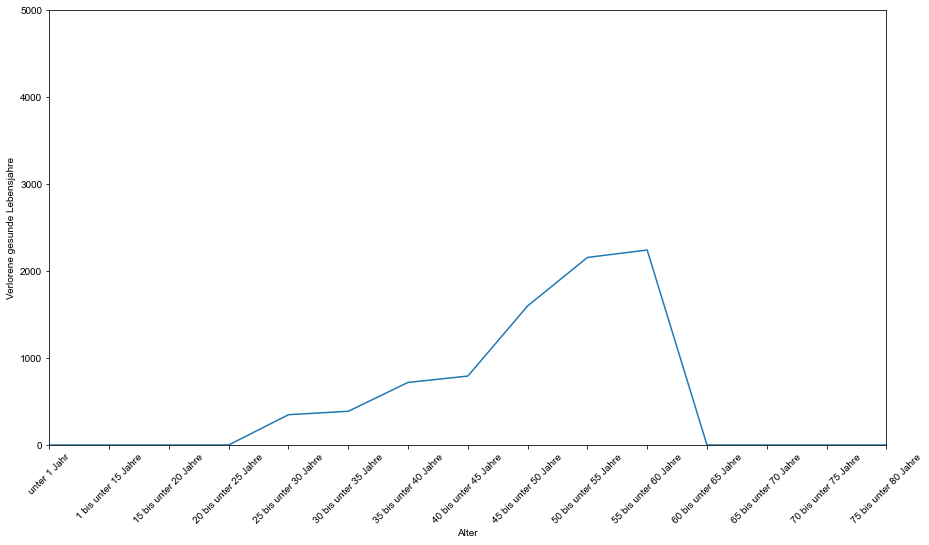

In [7]:
sns.lineplot(x="Alter",  y='lost time min', data=df_mann)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.ylabel("Verlorene gesunde Lebensjahre")

plt.xticks(df_mann.index, df_mann["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Maximal verlorene gesunde Lebensjahre

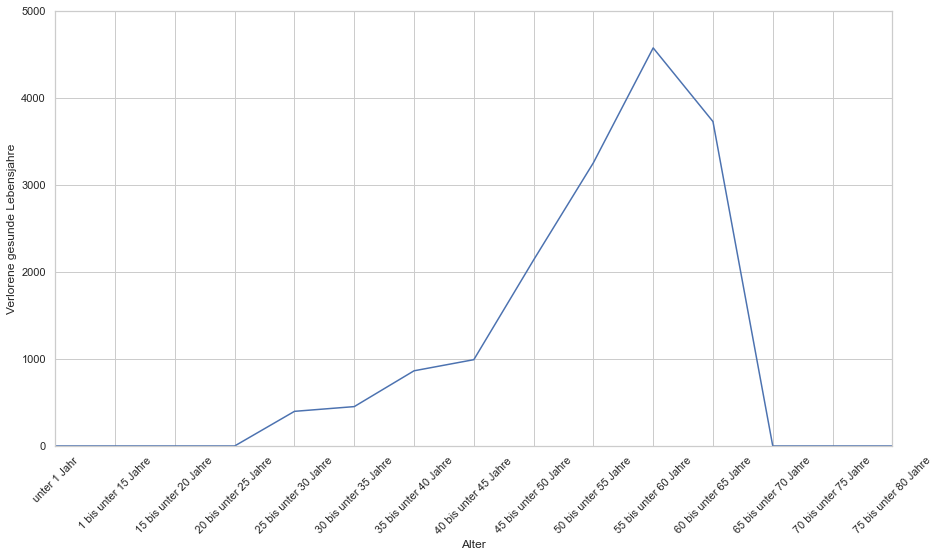

In [8]:
sns.lineplot(x="Alter",  y='lost time max', data=df_mann)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_mann.index, df_mann["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Sowohl mindestens verlorene, als auch maximal verlorene gesunde Lebensjahre

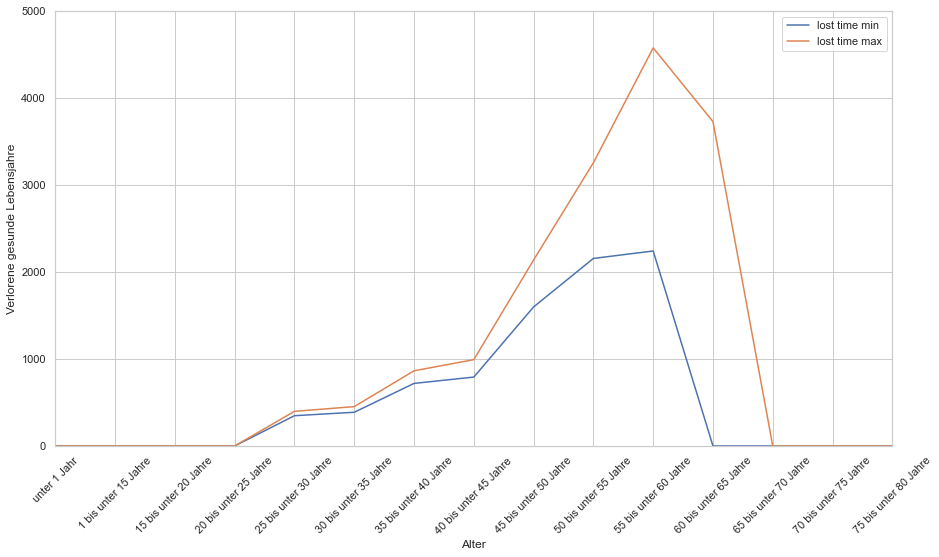

In [9]:
ax = sns.lineplot( x="Alter",  y='lost time min', data=df_mann)
sns.lineplot(ax=ax, x="Alter",  y='lost time max', data=df_mann)
sns.set_theme(style="whitegrid")
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.legend(labels=['lost time min','lost time max'])
plt.xticks(df_mann.index, df_mann["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Weibliche Todesfälle

In [10]:
df_weiblich = pd.DataFrame(df.weiblich)
df_weiblich["lost time max"] = 0
df_weiblich["lost time min"] = 0

df_weiblich.rename(columns={0:"Todesfaelle"}, inplace=True)
df_weiblich.index = df_weiblich.index.droplevel(1)

df_weiblich = df_weiblich.reset_index(level=0)
df_weiblich.set_index("Alter")
calc_min(df_weiblich, 68.5)
calc_max(df_weiblich, 68.5)
print(df_weiblich)

print("Weiblicher Datensatz")

                    Alter  Todesfaelle  lost time max  lost time min
0            unter 1 Jahr            0            0.0            0.0
1    1 bis unter 15 Jahre            3          202.5          160.5
2   15 bis unter 20 Jahre            0            0.0            0.0
3   20 bis unter 25 Jahre            0            0.0            0.0
4   25 bis unter 30 Jahre            6          261.0          231.0
5   30 bis unter 35 Jahre            4          154.0          134.0
6   35 bis unter 40 Jahre            8          268.0          228.0
7   40 bis unter 45 Jahre           20          570.0          470.0
8   45 bis unter 50 Jahre           42          987.0          777.0
9   50 bis unter 55 Jahre           87         1609.5         1174.5
10  55 bis unter 60 Jahre          161         2173.5         1368.5
11  60 bis unter 65 Jahre          332         2822.0         1162.0
12  65 bis unter 70 Jahre          492         1722.0            0.0
13  70 bis unter 75 Jahre         

C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time min"][i] = lost_time
C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time max"][i] = lost_time


Mindestens verlorene gesunde Lebensjahre

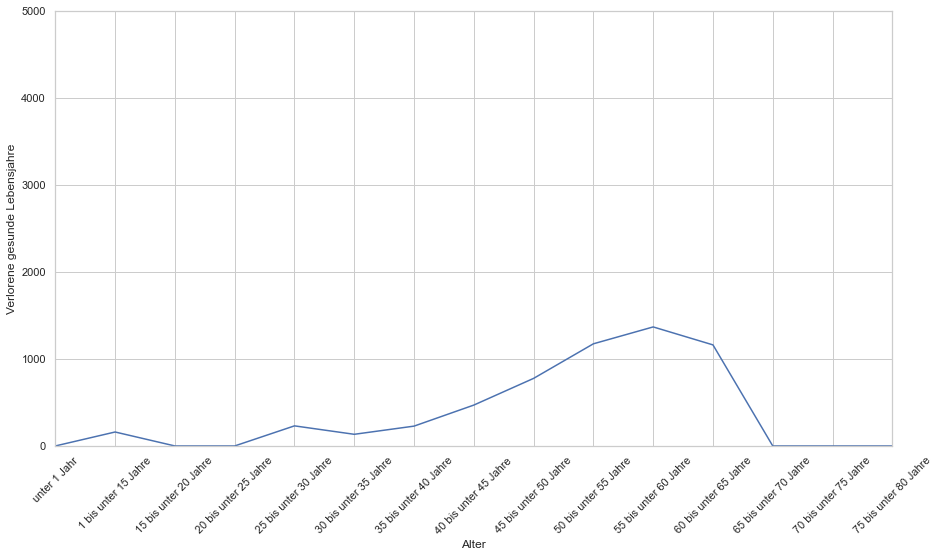

In [11]:
sns.lineplot(x="Alter",  y='lost time min', data=df_weiblich)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_weiblich.index, df_weiblich["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Maximal verlorene gesunde Lebensjahre

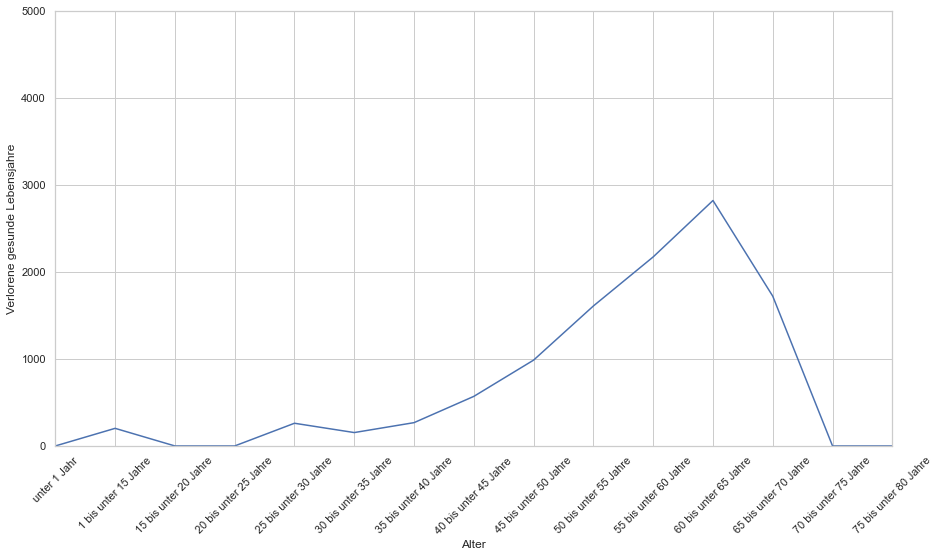

In [12]:
#df_weiblich.plot(x ='Alter', y='lost time max', kind = 'line')
sns.lineplot(x="Alter",  y='lost time max', data=df_weiblich)
sns.set_theme(style="whitegrid")
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_weiblich.index, df_weiblich["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)


Sowohl mindestens verlorene, als auch maximal verlorene gesunde Lebensjahre

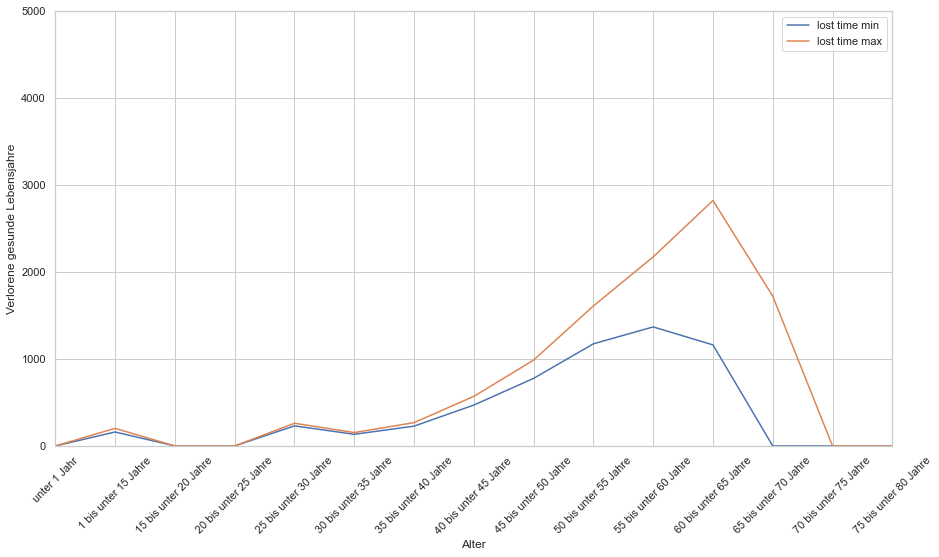

In [13]:
ax = sns.lineplot( x="Alter",  y='lost time min', data=df_weiblich)
sns.lineplot(ax=ax, x="Alter",  y='lost time max', data=df_weiblich)
sns.set_theme(style="whitegrid")
plt.legend(labels=['lost time min','lost time max'])
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_weiblich.index, df_weiblich["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Grippe weiblich

In [14]:
df_grippe_w = pd.DataFrame(df_grippe.weiblich)
df_grippe_w["lost time max"] = 0
df_grippe_w["lost time min"] = 0

df_grippe_w.rename(columns={0:"Todesfaelle"}, inplace=True)
df_grippe_w.index = df_grippe_w.index.droplevel(1)

df_grippe_w = df_grippe_w.reset_index(level=0)
df_grippe_w.set_index("Alter")
calc_min(df_grippe_w, 68.5)
calc_max(df_grippe_w, 68.5)

print(df_grippe_w)
print("Weiblicher Datensatz")

                    Alter  Todesfaelle  lost time max  lost time min
0            unter 1 Jahr            0            0.0            0.0
1    1 bis unter 15 Jahre            9          607.5          481.5
2   15 bis unter 20 Jahre            2          107.0           97.0
3   20 bis unter 25 Jahre            4          194.0          174.0
4   25 bis unter 30 Jahre            3          130.5          115.5
5   30 bis unter 35 Jahre            5          192.5          167.5
6   35 bis unter 40 Jahre            7          234.5          199.5
7   40 bis unter 45 Jahre           10          285.0          235.0
8   45 bis unter 50 Jahre           19          446.5          351.5
9   50 bis unter 55 Jahre           21          388.5          283.5
10  55 bis unter 60 Jahre           40          540.0          340.0
11  60 bis unter 65 Jahre           68          578.0          238.0
12  65 bis unter 70 Jahre           82          287.0            0.0
13  70 bis unter 75 Jahre         

C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time min"][i] = lost_time
C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time max"][i] = lost_time


In [15]:
df_grippe_m = pd.DataFrame(df_grippe.maennlich)
df_grippe_m["lost time max"] = 0
df_grippe_m["lost time min"] = 0


df_grippe_m.rename(columns={0:"Todesfaelle"}, inplace=True)
df_grippe_m.index = df_grippe_m.index.droplevel(1)

df_grippe_m = df_grippe_m.reset_index(level=0)
df_grippe_m.set_index("Alter")
calc_min(df_grippe_m, 64.8)
calc_max(df_grippe_m, 64.8)

print(df_grippe_m)
print("Männlicher Datensatz")



                    Alter  Todesfaelle  lost time max  lost time min
0            unter 1 Jahr            1           63.8           63.8
1    1 bis unter 15 Jahre            7          446.6          348.6
2   15 bis unter 20 Jahre            3          149.4          134.4
3   20 bis unter 25 Jahre            2           89.6           79.6
4   25 bis unter 30 Jahre            1           39.8           34.8
5   30 bis unter 35 Jahre            3          104.4           89.4
6   35 bis unter 40 Jahre            9          268.2          223.2
7   40 bis unter 45 Jahre            7          173.6          138.6
8   45 bis unter 50 Jahre           35          693.0          518.0
9   50 bis unter 55 Jahre           56          828.8          548.8
10  55 bis unter 60 Jahre           84          823.2          403.2
11  60 bis unter 65 Jahre          103          494.4            0.0
12  65 bis unter 70 Jahre          127            0.0            0.0
13  70 bis unter 75 Jahre         

C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time min"][i] = lost_time
C:\Users\jungc\AppData\Local\Temp\ipykernel_35572\2918524246.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["lost time max"][i] = lost_time


Mindestens verlorene gesunde Lebensjahre (Grippe, weiblich)

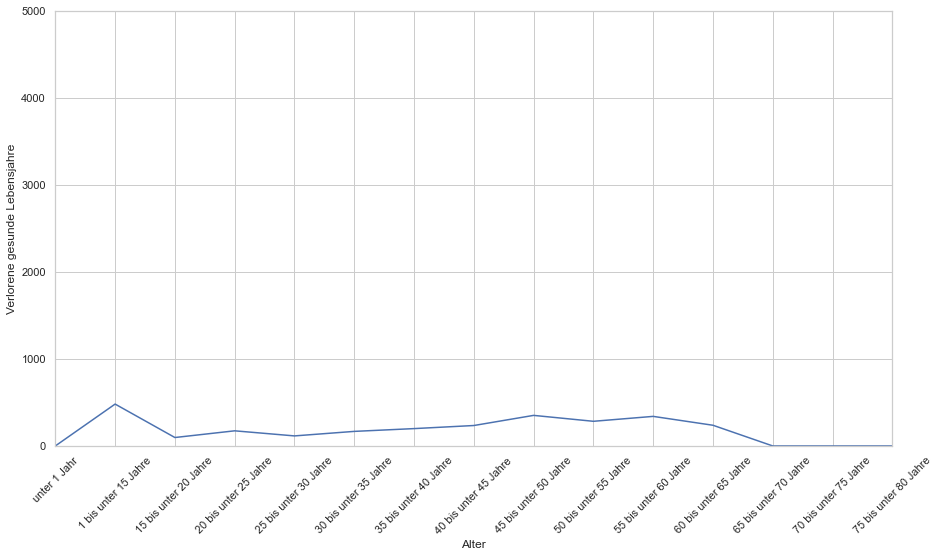

In [16]:
sns.lineplot(x="Alter",  y='lost time min', data=df_grippe_w)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Maximal verlorene gesunde Lebensjahre (Grippe, weiblich)

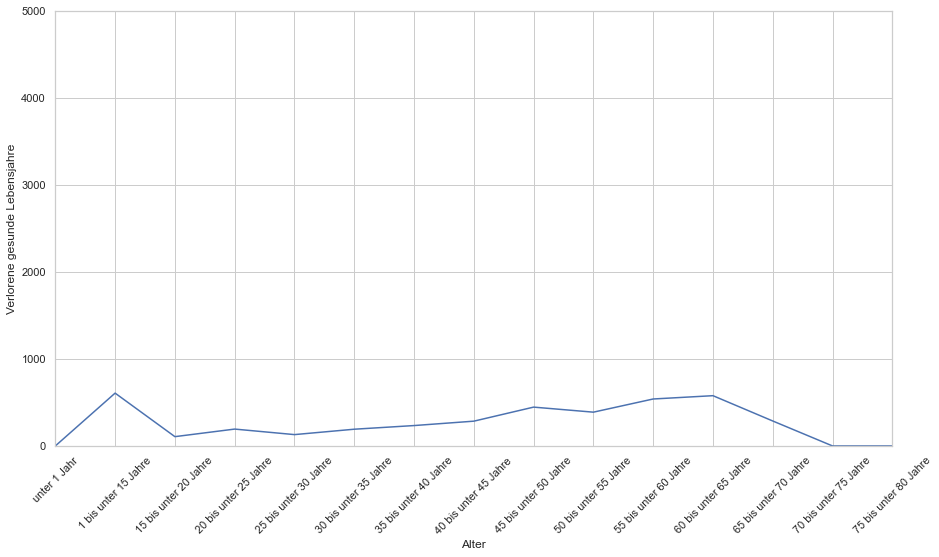

In [17]:
sns.lineplot(x="Alter",  y='lost time max', data=df_grippe_w)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Sowohl mindestens, als auch maximal verlorene gesunde Lebensjahre (Grippe, weiblich)

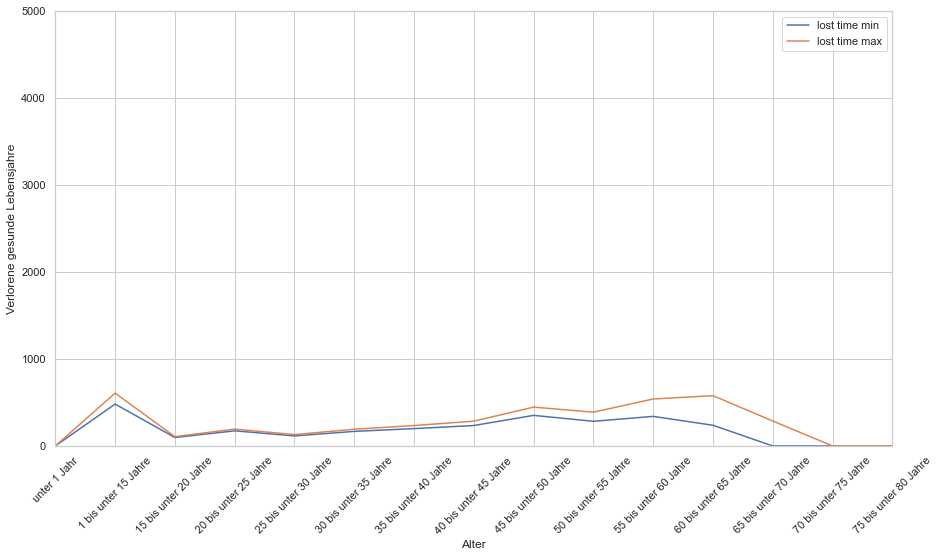

In [18]:
ax = sns.lineplot( x="Alter",  y='lost time min', data=df_grippe_w)
sns.lineplot(ax=ax, x="Alter",  y='lost time max', data=df_grippe_w)
sns.set_theme(style="whitegrid")
plt.legend(labels=['lost time min','lost time max'])
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Grippe vs Corona, weiblich max

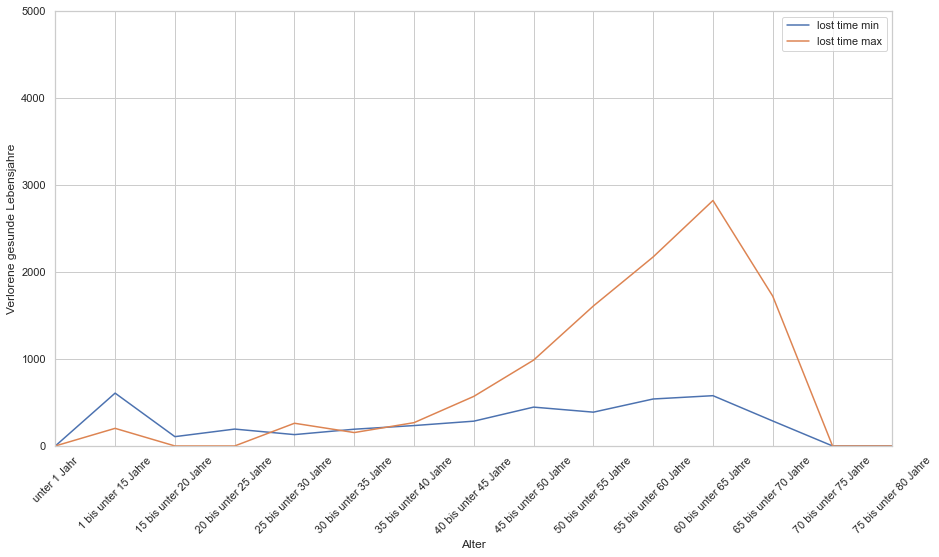

In [19]:
ax = sns.lineplot( x="Alter",  y='lost time max', data=df_grippe_w)
sns.lineplot(ax=ax, x="Alter",  y='lost time max', data=df_weiblich)
sns.set_theme(style="whitegrid")
plt.legend(labels=['lost time min','lost time max'])
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

Grippe vs Corona max, männlich

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticks'

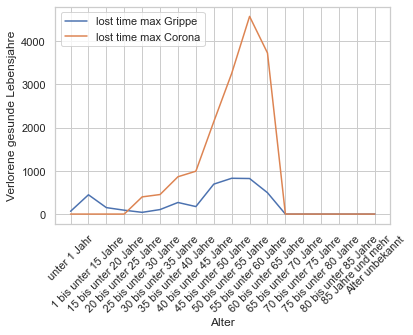

In [24]:
ax = sns.lineplot( x="Alter",  y='lost time max', data=df_grippe_m)
sns.lineplot(ax=ax, x="Alter",  y='lost time max', data=df_mann)
sns.set_theme(style="whitegrid")
plt.legend(labels=['lost time max Grippe','lost time max Corona'])
plt.ylabel("Verlorene gesunde Lebensjahre")
plt.xticks(df_grippe_m.index, df_grippe_m["Alter"], rotation=45)

plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)

In [21]:
print(df_mann)
print(df_weiblich)
print(df_grippe_m)
print(df_grippe_w)

                    Alter  Todesfaelle  lost time max  lost time min
0            unter 1 Jahr            0            0.0            0.0
1    1 bis unter 15 Jahre            0            0.0            0.0
2   15 bis unter 20 Jahre            0            0.0            0.0
3   20 bis unter 25 Jahre            0            0.0            0.0
4   25 bis unter 30 Jahre           10          398.0          348.0
5   30 bis unter 35 Jahre           13          452.4          387.4
6   35 bis unter 40 Jahre           29          864.2          719.2
7   40 bis unter 45 Jahre           40          992.0          792.0
8   45 bis unter 50 Jahre          108         2138.4         1598.4
9   50 bis unter 55 Jahre          220         3256.0         2156.0
10  55 bis unter 60 Jahre          467         4576.6         2241.6
11  60 bis unter 65 Jahre          777         3729.6            0.0
12  65 bis unter 70 Jahre         1230            0.0            0.0
13  70 bis unter 75 Jahre         

In [22]:
m_grippe_max = 0
for i in range (len(df_grippe_m.index)):
    m_grippe_max += df_grippe_m["lost time max"][i]
print("m_grippe_max: ", m_grippe_max)

m_grippe_min = 0
for i in range (len(df_grippe_m.index)):
    m_grippe_min += df_grippe_m["lost time min"][i]
print("m_grippe_min: ", m_grippe_min)
print("----------------------------------")

w_grippe_max = 0
for i in range (len(df_grippe_w.index)):
    w_grippe_max += df_grippe_w["lost time max"][i]
print("w_grippe_max: ", w_grippe_max)

w_grippe_min = 0
for i in range (len(df_grippe_w.index)):
    w_grippe_min += df_grippe_w["lost time min"][i]
print("w_grippe_min: ", w_grippe_min)
print("----------------------------------")

m_corona_max = 0
for i in range (len(df_mann.index)):
    m_corona_max += df_mann["lost time max"][i]
print("m_corona_max: ", m_corona_max)

m_corona_min = 0
for i in range (len(df_mann.index)):
    m_corona_min += df_mann["lost time min"][i]
print("m_corona_min: ", m_corona_min)
print("----------------------------------")
w_corona_max = 0
for i in range (len(df_weiblich.index)):
    w_corona_max += df_weiblich["lost time max"][i]
print("w_corona_max: ", w_corona_max)

w_corona_min = 0
for i in range (len(df_weiblich.index)):
    w_corona_min += df_weiblich["lost time min"][i]
print("w_corona_min: ", w_corona_min)



m_grippe_max:  4174.799999999999
m_grippe_min:  2582.399999999999
----------------------------------
w_grippe_max:  3991.0
w_grippe_min:  2683.0
----------------------------------
m_corona_max:  16407.199999999997
m_corona_min:  8242.599999999999
----------------------------------
w_corona_max:  10769.5
w_corona_min:  5705.5
